In [2]:
import xarray as xr
import os
import matplotlib.pyplot as plt
import numpy as np

# Zonal temperature

In [3]:
path = '/home/links/ct715/data_storage/reanalysis/jra55_daily/monthly'
file = os.path.join(path, 'jra55_mon_uvtw.nc')

ds = xr.open_dataset(file)
ds

<xarray.Dataset> Size: 4GB
Dimensions:  (time: 708, level: 37, lat: 73, lon: 144)
Coordinates:
  * lon      (lon) float64 1kB 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float64 584B 90.0 87.5 85.0 82.5 ... -82.5 -85.0 -87.5 -90.0
  * level    (level) float64 296B 1.0 2.0 3.0 5.0 ... 925.0 950.0 975.0 1e+03
  * time     (time) datetime64[ns] 6kB 1958-01-31 1958-02-28 ... 2016-12-31
Data variables:
    u        (time, level, lat, lon) float32 1GB ...
    v        (time, level, lat, lon) float32 1GB ...
    t        (time, level, lat, lon) float32 1GB ...
    omega    (time, level, lat, lon) float32 1GB ...

In [4]:
temp = ds['t'].mean(('lon', 'time'))
temp

<xarray.DataArray 't' (level: 37, lat: 73)> Size: 11kB
array([[259.78296, 259.80286, 259.84616, ..., 264.99387, 264.9098 ,
        264.87036],
       [245.87608, 245.90308, 245.97418, ..., 249.80914, 249.64212,
        249.57117],
       [238.70558, 238.73944, 238.82932, ..., 241.0531 , 240.85603,
        240.77625],
       ...,
       [256.97455, 257.07748, 257.3496 , ..., 246.17726, 243.499  ,
        241.83253],
       [256.42288, 256.51685, 256.7757 , ..., 247.07956, 244.42657,
        242.75366],
       [256.6256 , 256.71106, 256.95123, ..., 247.97493, 245.33363,
        243.65492]], dtype=float32)
Coordinates:
  * lat      (lat) float64 584B 90.0 87.5 85.0 82.5 ... -82.5 -85.0 -87.5 -90.0
  * level    (level) float64 296B 1.0 2.0 3.0 5.0 ... 925.0 950.0 975.0 1e+03

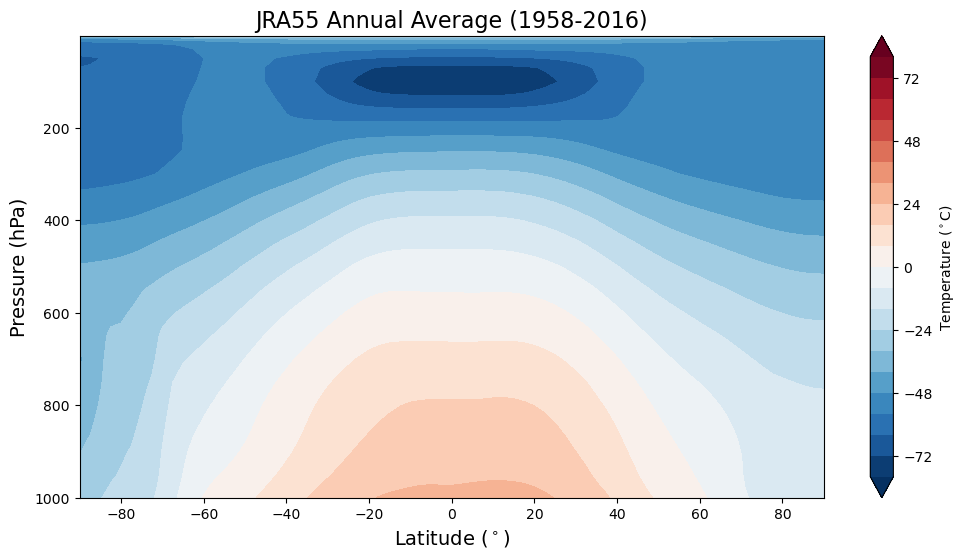

In [5]:
C = temp + -272.15

plt.figure(figsize=(12,6))

plt.contourf(C.lat, C.level, C, levels=np.linspace(-80,80,21), 
             cmap='RdBu_r', extend='both')
cbar = plt.colorbar(label='Temperature ($^\circ$C)')
plt.title('JRA55 Annual Average (1958-2016)', fontsize=16)
plt.xlabel('Latitude ($^\circ$)', fontsize=14)
plt.ylabel('Pressure (hPa)', fontsize=14)
plt.gca().invert_yaxis()

plt.show()

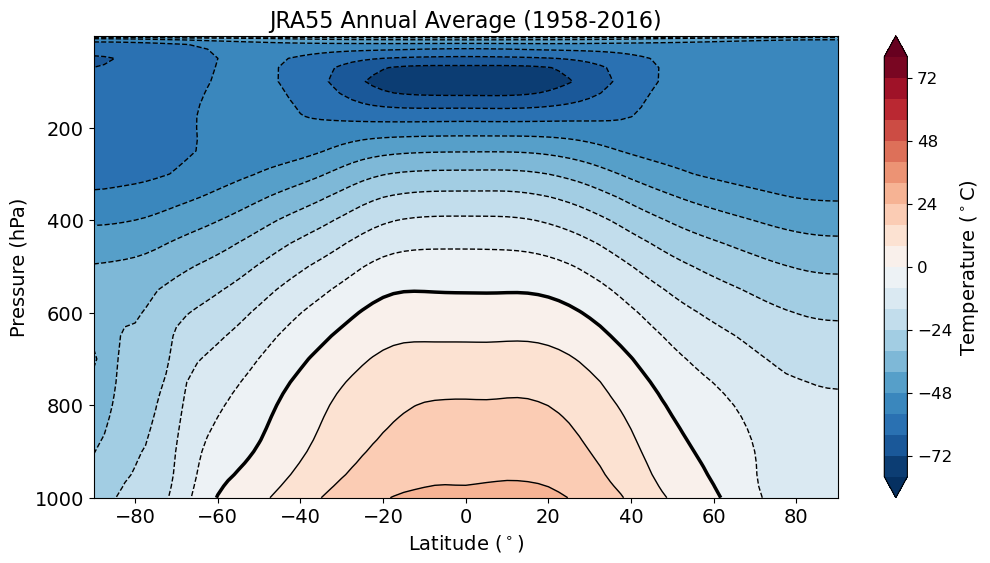

In [17]:
import numpy as np
import matplotlib.pyplot as plt

C = temp + -272.15

plt.figure(figsize=(12,6))

# Levels
levels = np.linspace(-80, 80, 21)

# Filled contour
plt.contourf(C.lat.values, C.level.values, C.values, levels=levels, cmap='RdBu_r', extend='both')
cbar = plt.colorbar()

# Set colorbar label and its font size
cbar.set_label('Temperature ($^\circ$C)', fontsize=14)

# Set colorbar tick label font size
cbar.ax.tick_params(labelsize=12)

# Positive contours (solid)
pos_levels = [lvl for lvl in levels if lvl > 0]
plt.contour(C.lat.values, C.level.values, C.values, levels=pos_levels, colors='black', linestyles='solid', linewidths=1)

# Negative contours (dashed)
neg_levels = [lvl for lvl in levels if lvl < 0]
plt.contour(C.lat.values, C.level.values, C.values, levels=neg_levels, colors='black', linestyles='dashed', linewidths=1)

# Zero contour (solid, thicker)
zero_level = [0]
plt.contour(C.lat.values, C.level.values, C.values, levels=zero_level, colors='black', linestyles='solid', linewidths=2.5)

# Labels etc.
plt.title('JRA55 Annual Average (1958-2016)', fontsize=16)
plt.xlabel('Latitude ($^\circ$)', fontsize=14)
plt.ylabel('Pressure (hPa)', fontsize=14)

# Tick label font size for axes
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.gca().invert_yaxis()

plt.savefig('plots/jra55_temp_contour.pdf')
plt.show()
